In [1]:
# Imports
import collections

import numpy as np
import matplotlib.pyplot as plt

from blind_robot.utils.data_utils import int2task

In [2]:
# episode ranges
debug_episodes = {
    'calvin_scene_D': [358482, 361252]
}
d_episodes = {
    'calvin_scene_D': [0, 611098]
}
abc_epsiodes = {
    'calvin_scene_B': [0, 598909], 
    'calvin_scene_C': [598910, 1191338], 
    'calvin_scene_A': [1191339, 1795044]
}
abcd_epsiodes = {
    'calvin_scene_D': [0, 611098], 
    'calvin_scene_B': [611099, 1210008],
    'calvin_scene_C': [1210009, 1802437],
    'calvin_scene_A': [1802438, 2406143]
}
val_episodes = {
    'calvin_scene_D': [0, 611098]
}

In [3]:
def read_data(env):
    
    # train files
    train_base_file        = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-training.tsv"
    train_controllers_file = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-training-controllers.tsv"
    train_tactile_file     = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-training-tactile.tsv"
    train_lang_file        = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-training-lang.tsv"

    # validation files
    val_base_file        = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-validation.tsv"
    val_controllers_file = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-validation-controllers.tsv"
    val_tactile_file     = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-validation-tactile.tsv"
    val_lang_file        = f"/Users/emrecanacikgoz/Desktop/rl-project/data/{env}-validation-lang.tsv"
    
    # train data
    train_base        = np.loadtxt(train_base_file,        delimiter='\t', dtype='float32')
    train_controllers = np.loadtxt(train_controllers_file, delimiter='\t', dtype='float32')
    train_tactile     = np.loadtxt(train_tactile_file,     delimiter='\t', dtype='float32')
    train_lang        = np.loadtxt(train_lang_file,        delimiter='\t', dtype='str')

    # validation data
    val_base          = np.loadtxt(val_base_file,          delimiter='\t', dtype='float32')
    val_controllers   = np.loadtxt(val_controllers_file,   delimiter='\t', dtype='float32')
    val_tactile       = np.loadtxt(val_tactile_file,       delimiter='\t', dtype='float32')
    val_lang          = np.loadtxt(val_lang_file,          delimiter='\t', dtype='str')
    
    return train_base, train_controllers, train_tactile, train_lang, val_base, val_controllers, val_tactile, val_lang



def annotation_percentage(env, train_base, train_lang):

    # all state IDs
    files = train_base[:, 0].astype(int).tolist()

    # annotated state IDs
    annotated_files = [list(range(int(annotation[0]), int(annotation[1]) + 1)) for annotation in train_lang]
    all_annotated_files = [state for episode in annotated_files for state in episode]
    
    return print(f"{env} annonated file percentage: {len(all_annotated_files)}/{len(files)} = {len(all_annotated_files)/len(files)*100:.2f}%")

In [4]:
# read data
train_base_abcd, train_controllers_abcd, train_tactile_abcd, train_lang_abcd, val_base_abcd, val_controllers_abcd, val_tactile_abcd, val_lang_abcd = read_data("ABCD")
train_base_abc, train_controllers_abc, train_tactile_abc, train_lang_abc, val_base_abc, val_controllers_abc, val_tactile_abc, val_lang_abc = read_data("ABC")
train_base_d, train_controllers_d, train_tactile_d, train_lang_d, val_base_d, val_controllers_d, val_tactile_d, val_lang_d = read_data("D")

# Annotation Percentages

In [5]:
# ABCD
annotation_percentage("ABCD-train", train_base_abcd, train_lang_abcd)
annotation_percentage("ABCD-val", val_base_abcd, val_lang_abcd)

ABCD-train annonated file percentage: 1380566/2307126 = 59.84%
ABCD-val annonated file percentage: 64793/99022 = 65.43%


In [6]:
# ABC
annotation_percentage("ABC-train", train_base_abc, train_lang_abc)
annotation_percentage("ABC-val", val_base_abc, val_lang_abc)

ABC-train annonated file percentage: 1071743/1795045 = 59.71%
ABC-val annonated file percentage: 64793/99022 = 65.43%


In [7]:
# D
annotation_percentage("D-train", train_base_d, train_lang_d)
annotation_percentage("D-val", val_base_d, val_lang_d)

D-train annonated file percentage: 308918/512077 = 60.33%
D-val annonated file percentage: 60575/99022 = 61.17%


## ABCD Class Statistics

In [8]:
# get annotation-train ranges
annotated_files = [(list(range(int(annotation[0]), int(annotation[1]) + 1)), int2task.index(annotation[2])) for annotation in train_lang_abcd]

# get annotation-val ranges
annotated_files_val = [(list(range(int(annotation[0]), int(annotation[1]) + 1)), int2task.index(annotation[2])) for annotation in val_lang_abcd]

In [9]:
# get train classes for each state and corresponding class
all_states, all_classes, a_class, b_class, c_class, d_class = [], [], [], [], [], []
for file in annotated_files:
    episode, task = file[0], file[1]
    
    for state in episode:
        all_states.append(state)
        all_classes.append(task)
        if state in range(0, 611098):
            d_class.append(task)
        elif state in range(611099, 1210008):
            c_class.append(task)
        elif state in range(1210009, 1802437):
            b_class.append(task)
        elif state in range(1802438, 2406143):
            a_class.append(task)
        else:
            raise "no files found"

# get val classes for each state and corresponding class
val_states, val_classes = [], []
for file in annotated_files_val:
    episode, task = file[0], file[1]
    
    for state in episode:
        val_states.append(state)
        val_classes.append(task)           

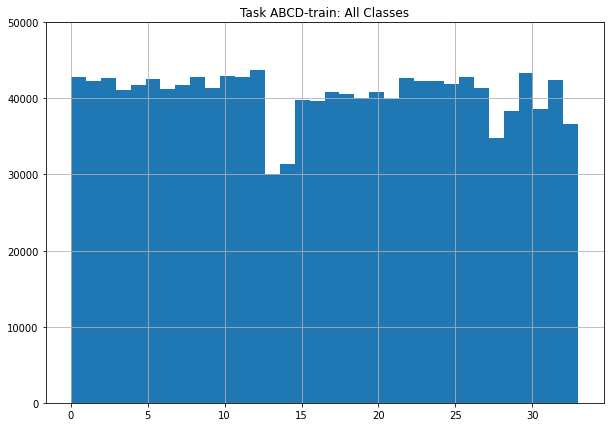

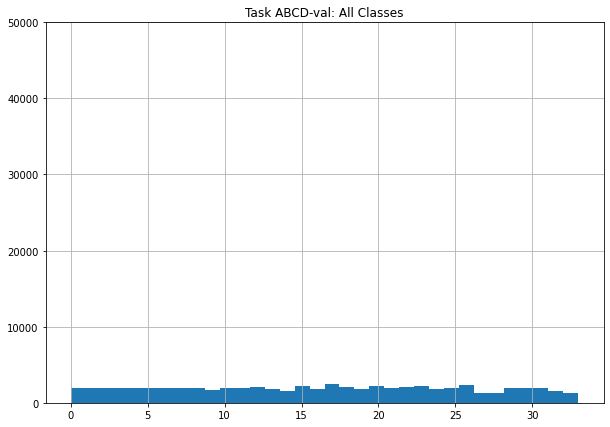

In [10]:
# ABCD-train all envs class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(all_classes, bins = 34)
plt.title("Task ABCD-train: All Classes")
plt.ylim(0, 50000)
plt.grid()
plt.show()

# ABCD-val all envs class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(val_classes, bins = 34)
plt.ylim(0, 50000)
plt.title("Task ABCD-val: All Classes")
plt.grid()
plt.show()

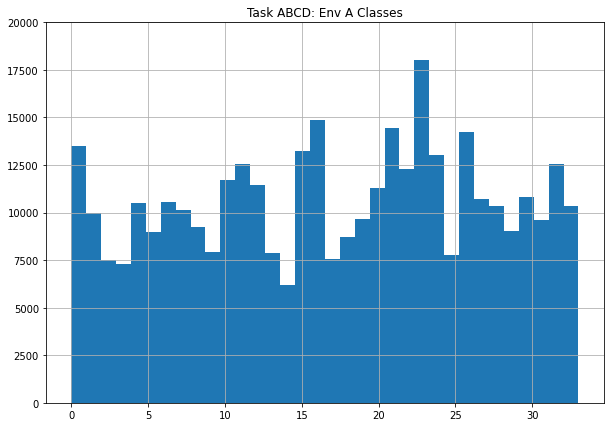

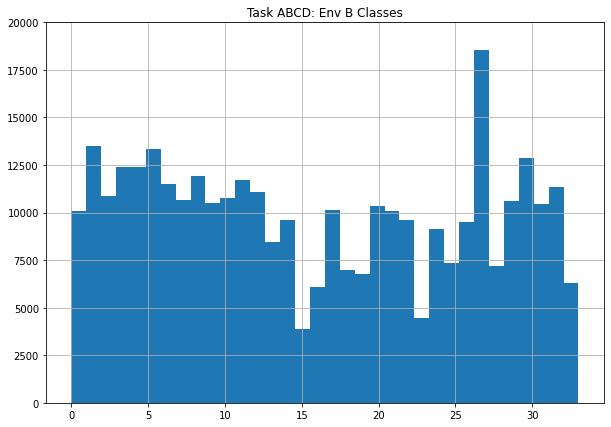

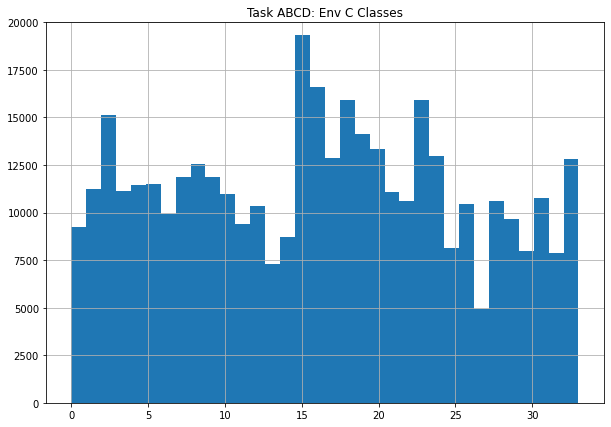

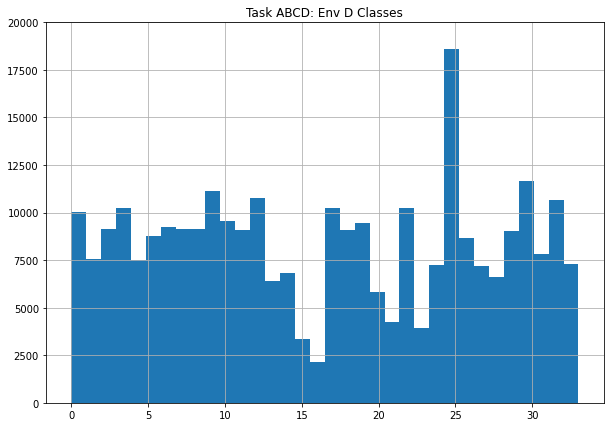

In [11]:
# ABCD A env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a_class, bins = 34)
plt.title("Task ABCD: Env A Classes")
plt.ylim(0, 20000)
plt.grid()
plt.show()

# ABCD B env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(b_class, bins = 34)
plt.title("Task ABCD: Env B Classes")
plt.ylim(0, 20000)
plt.grid()
plt.show()

# ABCD C env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(c_class, bins = 34)
plt.title("Task ABCD: Env C Classes")
plt.ylim(0, 20000)
plt.grid()
plt.show()

# ABCD D env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(d_class, bins = 34)
plt.title("Task ABCD: Env D Classes")
plt.ylim(0, 20000)
plt.grid()
plt.show()

In [12]:
# print abcd-train freq dictionary
abcd_all_freq = collections.Counter(all_classes)
print("ABCD-train all classes Frequencies")
print(f"{dict(sorted(abcd_all_freq.items()))}\n")

# print abcd-val freq dictionary
abcd_val_freq = collections.Counter(val_classes)
print("ABCD-val all classes Frequencies")
print(f"{dict(sorted(abcd_val_freq.items()))}\n")

# print abcd env A freq dictionary
abcd_a_freq = collections.Counter(a_class)
print("ABCD Env A class Frequencies")
print(f"{dict(sorted(abcd_a_freq.items()))}\n")

# print abcd env B freq dictionary
abcd_b_freq = collections.Counter(b_class)
print("ABCD Env B class Frequencies")
print(f"{dict(sorted(abcd_b_freq.items()))}\n")

# print abcd env C freq dictionary
abcd_c_freq = collections.Counter(c_class)
print("ABCD Env C class Frequencies")
print(f"{dict(sorted(abcd_c_freq.items()))}\n")

# print abcd env D freq dictionary
abcd_d_freq = collections.Counter(d_class)
print("ABCD Env D class Frequencies")
print(f"{dict(sorted(abcd_d_freq.items()))}\n")

ABCD-train all classes Frequencies
{0: 42842, 1: 42277, 2: 42645, 3: 41115, 4: 41814, 5: 42603, 6: 41251, 7: 41738, 8: 42798, 9: 41421, 10: 42994, 11: 42750, 12: 43670, 13: 30009, 14: 31313, 15: 39781, 16: 39705, 17: 40791, 18: 40619, 19: 40006, 20: 40816, 21: 39879, 22: 42707, 23: 42341, 24: 42314, 25: 41862, 26: 42870, 27: 41430, 28: 34742, 29: 38337, 30: 43323, 31: 38661, 32: 42447, 33: 36695}

ABCD-val all classes Frequencies
{0: 1950, 1: 1950, 2: 1908, 3: 1950, 4: 1950, 5: 1950, 6: 1950, 7: 1950, 8: 1950, 9: 1621, 10: 1950, 11: 1950, 12: 2015, 13: 1878, 14: 1555, 15: 2204, 16: 1879, 17: 2518, 18: 2048, 19: 1785, 20: 2226, 21: 1885, 22: 2044, 23: 2218, 24: 1832, 25: 1984, 26: 2275, 27: 1336, 28: 1298, 29: 1950, 30: 1950, 31: 1950, 32: 1607, 33: 1327}

ABCD Env A class Frequencies
{0: 13495, 1: 9974, 2: 7505, 3: 7290, 4: 10526, 5: 8964, 6: 10553, 7: 10113, 8: 9221, 9: 7929, 10: 11692, 11: 12568, 12: 11460, 13: 7871, 14: 6193, 15: 13217, 16: 14849, 17: 7567, 18: 8694, 19: 9637, 20: 1

# ABC Class Statistics

In [13]:
# get annotation-train ranges
annotated_files = [(list(range(int(annotation[0]), int(annotation[1]) + 1)), int2task.index(annotation[2])) for annotation in train_lang_abc]

# get annotation-val ranges
annotated_files_val = [(list(range(int(annotation[0]), int(annotation[1]) + 1)), int2task.index(annotation[2])) for annotation in val_lang_abc]

In [14]:
# get train classes for each state and corresponding class
all_states, all_classes, a_class, b_class, c_class = [], [], [], [], []
for file in annotated_files:
    episode, task = file[0], file[1]
    
    for state in episode:
        all_states.append(state)
        all_classes.append(task)
        if state in range(0, 598909):
            b_class.append(task)
        elif state in range(598910, 1191338):
            c_class.append(task)
        elif state in range(1191339, 1795044):
            a_class.append(task)
        else:
            raise "no files found"

# get val classes for each state and corresponding class
val_states, val_classes = [], []
for file in annotated_files_val:
    episode, task = file[0], file[1]
    
    for state in episode:
        val_states.append(state)
        val_classes.append(task)  

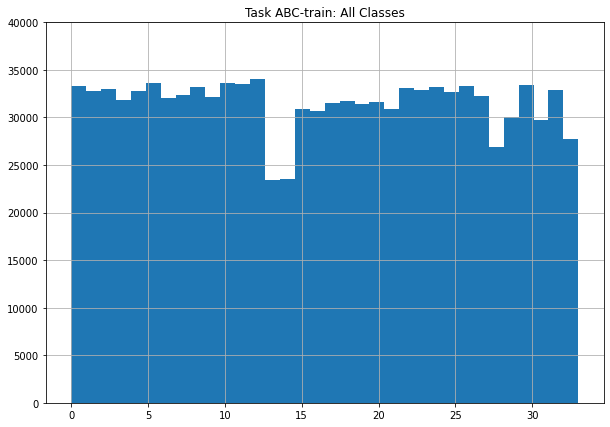

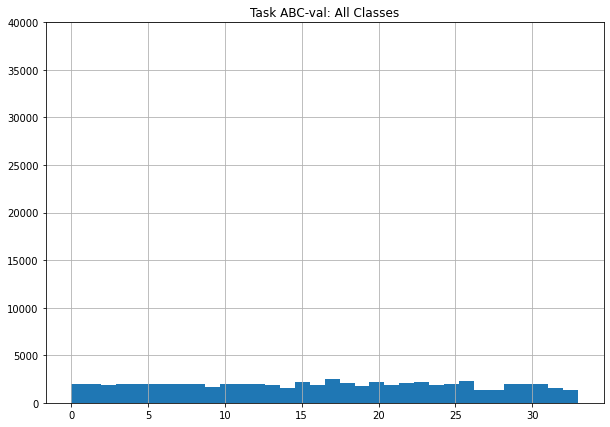

In [15]:
# ABC-train all envs class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(all_classes, bins = 34)
plt.title("Task ABC-train: All Classes")
plt.grid()
plt.ylim(0, 40000) 
plt.show()

# ABC-val all envs class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(val_classes, bins = 34)
plt.title("Task ABC-val: All Classes")
plt.ylim(0, 40000) 
plt.grid()
plt.show()

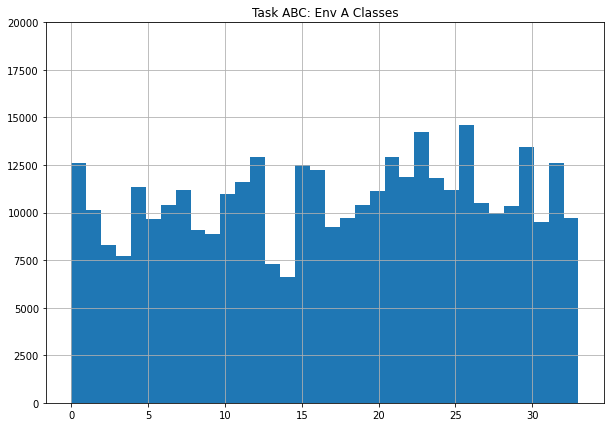

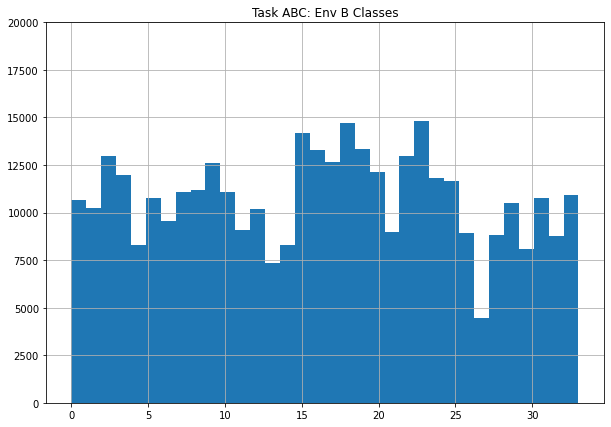

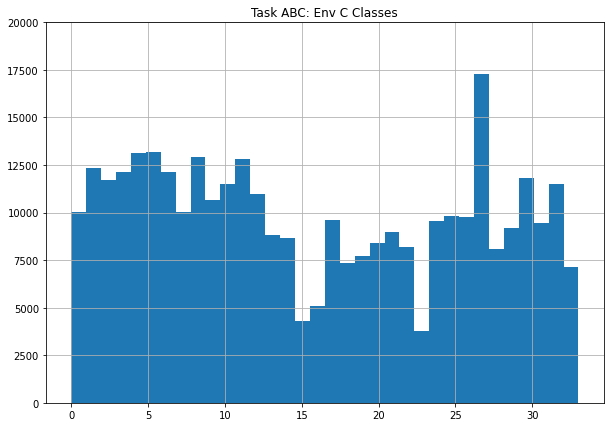

In [16]:
# ABC A env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a_class, bins = 34)
plt.title("Task ABC: Env A Classes")
plt.ylim(0, 20000)
plt.grid()
plt.show()

# ABC B env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(b_class, bins = 34)
plt.ylim(0, 20000)
plt.title("Task ABC: Env B Classes")
plt.grid()
plt.show()

# ABC C env class histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(c_class, bins = 34)
plt.ylim(0, 20000)
plt.title("Task ABC: Env C Classes")
plt.grid()
plt.show()

In [17]:
# print abc-train freq dictionary
abc_all_freq = collections.Counter(all_classes)
print("ABC-train all classes Frequencies")
print(f"{dict(sorted(abc_all_freq.items()))}\n")

# print abc-val freq dictionary
abc_val_freq = collections.Counter(val_classes)
print("ABC-val all classes Frequencies")
print(f"{dict(sorted(abcd_val_freq.items()))}\n")

# print abc env A freq dictionary
abc_a_freq = collections.Counter(a_class)
print("ABC Env A class Frequencies")
print(f"{dict(sorted(abcd_a_freq.items()))}\n")

# print abc env B freq dictionary
abc_b_freq = collections.Counter(b_class)
print("ABC Env B class Frequencies")
print(f"{dict(sorted(abcd_b_freq.items()))}\n")

# print abc env C freq dictionary
abc_c_freq = collections.Counter(c_class)
print("ABC Env C class Frequencies")
print(f"{dict(sorted(abcd_c_freq.items()))}\n")

ABC-train all classes Frequencies
{0: 33286, 1: 32736, 2: 32979, 3: 31793, 4: 32759, 5: 33568, 6: 32079, 7: 32306, 8: 33161, 9: 32144, 10: 33617, 11: 33497, 12: 34065, 13: 23427, 14: 23569, 15: 30919, 16: 30642, 17: 31501, 18: 31746, 19: 31434, 20: 31632, 21: 30892, 22: 33041, 23: 32838, 24: 33156, 25: 32668, 26: 33294, 27: 32218, 28: 26937, 29: 30025, 30: 33376, 31: 29764, 32: 32900, 33: 27774}

ABC-val all classes Frequencies
{0: 1950, 1: 1950, 2: 1908, 3: 1950, 4: 1950, 5: 1950, 6: 1950, 7: 1950, 8: 1950, 9: 1621, 10: 1950, 11: 1950, 12: 2015, 13: 1878, 14: 1555, 15: 2204, 16: 1879, 17: 2518, 18: 2048, 19: 1785, 20: 2226, 21: 1885, 22: 2044, 23: 2218, 24: 1832, 25: 1984, 26: 2275, 27: 1336, 28: 1298, 29: 1950, 30: 1950, 31: 1950, 32: 1607, 33: 1327}

ABC Env A class Frequencies
{0: 13495, 1: 9974, 2: 7505, 3: 7290, 4: 10526, 5: 8964, 6: 10553, 7: 10113, 8: 9221, 9: 7929, 10: 11692, 11: 12568, 12: 11460, 13: 7871, 14: 6193, 15: 13217, 16: 14849, 17: 7567, 18: 8694, 19: 9637, 20: 1127